# ☑️ Feature Selection

### Daten laden

In [2]:
# IMPORT LIBRARIES
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
from sklearn.feature_selection import f_regression as fr

# LOAD DATA
df = pd.read_csv('05_house_price.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,2


In [3]:
# FEATURES & TARGET
x = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

In [ ]:
# FEATURES & TARGET NACH F_REGRESSION


### 💪 Training mit Linearer Regression

In [4]:
# INITIALIZE MODEL
lr = LinearRegression()

# SPLIT DATA
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.4, random_state=1234)
lr.fit(X_train, Y_train)

# MAKE PREDICTIONS
Y_predict = lr.predict(X_test)


### 🧐 Evaluate Predictions
Berechne die Kennzahlen **RMSE** und **R²**.

In [5]:
# CALCULATE RMSE
rmse = math.sqrt(mean_squared_error(Y_test, Y_predict))
print(f"RMSE: {rmse:.2f}")

# CALUCALTE R²
r2 = lr.score(X_test, Y_test)
print(f"R²: {r2:.2f}")

RMSE: 69064.50
R²: 0.64


### Feature Selection
Feature mittels <code>f_regresion</code> auswählen.

In [6]:
# F_REGRESSION
f_values, p_values = fr(x, y)

# SAVE RESULTS
feature_scores = pd.DataFrame({
    'Feature': x.columns,
    'F-Value': f_values,
    'P-Value': p_values
}).sort_values(by='F-Value', ascending=True)

# CONVERT TO INT
feature_scores['F-Value'] = feature_scores['F-Value'].astype(float)

# FORMAT
feature_scores['F-Value'] = feature_scores['F-Value'].map('{:.2f}'.format)
feature_scores['P-Value'] = feature_scores['P-Value'].map('{:.6f}'.format)

# PRINT RESULTS
print(feature_scores)

              Feature   F-Value   P-Value
5          population     12.55  0.000398
0           longitude     43.70  0.000000
4      total_bedrooms     50.60  0.000000
6          households     89.86  0.000000
2  housing_median_age    232.84  0.000000
3         total_rooms    378.23  0.000000
1            latitude    438.01  0.000000
8     ocean_proximity    957.83  0.000000
7       median_income  18556.57  0.000000


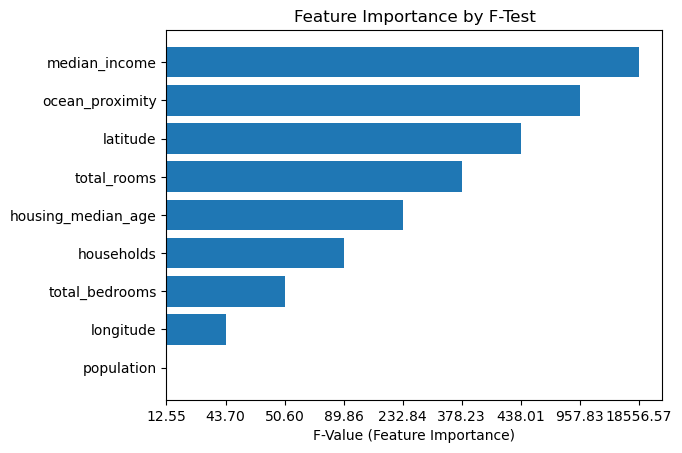

In [7]:
# IMPORT LIBRARIES
import matplotlib.pyplot as plt

# BAR CHART
plt.barh(feature_scores['Feature'], feature_scores['F-Value'])
plt.xlabel('F-Value (Feature Importance)')
plt.title('Feature Importance by F-Test')
plt.show()